# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [51]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [52]:
url = "http://api.openweathermap.org/data/2.5/weather?"
i = 1
j = 1
setnum = 1
mtrcs = "metric"

resp=[]

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + mtrcs
    print(f"Processing Record {i} of set {setnum} | {city}")
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    i = i + 1
    if i == 50:
        setnum = setnum + 1
        i = 1

    if weather_json['cod'] == 404:
        print("City not found. Skipping...")
    elif weather_json['cod'] == 200:
        resp.append(weather_json)
        
    # remove the below code before final check in
    #j = j + 1
    #if j == 20:
    #    break

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | busselton
Processing Record 2 of set 1 | issoire
Processing Record 3 of set 1 | mount gambier
Processing Record 4 of set 1 | puerto ayora
Processing Record 5 of set 1 | gigmoto
Processing Record 6 of set 1 | longyearbyen
Processing Record 7 of set 1 | hafizabad
Processing Record 8 of set 1 | bredasdorp
Processing Record 9 of set 1 | ahipara
Processing Record 10 of set 1 | cape town
Processing Record 11 of set 1 | mataura
Processing Record 12 of set 1 | torbay
Processing Record 13 of set 1 | baijiantan
Processing Record 14 of set 1 | illoqqortoormiut
Processing Record 15 of set 1 | higuey
Processing Record 16 of set 1 | amderma
Processing Record 17 of set 1 | atuona
Processing Record 18 of set 1 | kuju
Processing Record 19 of set 1 | manoel urbano
Processing Record 20 of set 1 | oranjemund
Processing Record 21 of set 1 | saldanha
Processing Record 22 of set 1 | new norfolk
Processing Record 23 of set 1

Processing Record 4 of set 5 | ancud
Processing Record 5 of set 5 | siocon
Processing Record 6 of set 5 | kurkino
Processing Record 7 of set 5 | seminole
Processing Record 8 of set 5 | hamilton
Processing Record 9 of set 5 | vestbygda
Processing Record 10 of set 5 | ewa beach
Processing Record 11 of set 5 | concordia
Processing Record 12 of set 5 | goteborg
Processing Record 13 of set 5 | tual
Processing Record 14 of set 5 | sedona
Processing Record 15 of set 5 | chalon-sur-saone
Processing Record 16 of set 5 | fortuna
Processing Record 17 of set 5 | vaitupu
Processing Record 18 of set 5 | fountain hills
Processing Record 19 of set 5 | loandjili
Processing Record 20 of set 5 | moerai
Processing Record 21 of set 5 | alofi
Processing Record 22 of set 5 | cockburn town
Processing Record 23 of set 5 | terrace
Processing Record 24 of set 5 | narsaq
Processing Record 25 of set 5 | vestmannaeyjar
Processing Record 26 of set 5 | qaanaaq
Processing Record 27 of set 5 | saskylakh
Processing Reco

Processing Record 6 of set 9 | kungur
Processing Record 7 of set 9 | sur
Processing Record 8 of set 9 | imbituba
Processing Record 9 of set 9 | bargal
Processing Record 10 of set 9 | vytegra
Processing Record 11 of set 9 | taicheng
Processing Record 12 of set 9 | samarai
Processing Record 13 of set 9 | todos santos
Processing Record 14 of set 9 | grindavik
Processing Record 15 of set 9 | bud
Processing Record 16 of set 9 | husavik
Processing Record 17 of set 9 | kenai
Processing Record 18 of set 9 | danielskuil
Processing Record 19 of set 9 | erzin
Processing Record 20 of set 9 | uruacu
Processing Record 21 of set 9 | pevek
Processing Record 22 of set 9 | zachagansk
Processing Record 23 of set 9 | mayor pablo lagerenza
Processing Record 24 of set 9 | lida
Processing Record 25 of set 9 | seydi
Processing Record 26 of set 9 | jalu
Processing Record 27 of set 9 | okhotsk
Processing Record 28 of set 9 | wazzan
Processing Record 29 of set 9 | matara
Processing Record 30 of set 9 | port-gent

Processing Record 8 of set 13 | maputo
Processing Record 9 of set 13 | bossangoa
Processing Record 10 of set 13 | alenquer
Processing Record 11 of set 13 | lephepe
Processing Record 12 of set 13 | qostanay
Processing Record 13 of set 13 | meyungs
Processing Record 14 of set 13 | lasa
Processing Record 15 of set 13 | vanimo


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [53]:
city = []
lat = []
lng = []
maxt = []
humid = []
cloud = []
wind = []
cnt = []
dt = []

for wresponse in resp:
        city.append(wresponse['name'])
        lat.append(wresponse['coord']['lat'])
        lng.append(wresponse['coord']['lon'])
        maxt.append(wresponse['main']['temp_max'])
        humid.append(wresponse['main']['humidity'])
        cloud.append(wresponse['clouds']['all'])
        wind.append(wresponse['wind']['speed'])
        cnt.append(wresponse['sys']['country'])
        dt.append(wresponse['dt'])
        
weather_dict = {
    "City": city,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxt,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": cnt,
    "Date": dt,
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,22.22,83,100,1.34,AU,1614747150
1,Issoire,45.5500,3.2500,5.00,52,0,2.17,FR,1614747151
2,Mount Gambier,-37.8333,140.7667,18.00,52,90,6.69,AU,1614747151
3,Puerto Ayora,-0.7393,-90.3518,24.44,95,91,0.45,EC,1614747151
4,Gigmoto,13.7796,124.3900,26.86,80,44,5.73,PH,1614747151
5,Longyearbyen,78.2186,15.6401,-15.00,72,0,2.57,SJ,1614747151
6,Hafizabad,32.0679,73.6854,25.80,17,10,2.38,PK,1614747152
7,Bredasdorp,-34.5322,20.0403,16.00,94,15,1.03,ZA,1614747152
8,Ahipara,-35.1667,173.1667,20.51,87,100,4.38,NZ,1614747152
9,Cape Town,-33.9258,18.4232,18.33,94,90,2.57,ZA,1614747152


In [54]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,20.914274,10.651877,10.546154,73.104396,49.181319,3.538626,1.614747e+09
std,33.627427,91.835045,16.503267,21.581892,39.365403,2.510958,8.059255e+01
min,-54.800000,-179.166700,-38.250000,10.000000,0.000000,0.280000,1.614747e+09
25%,-5.658350,-69.948125,0.000000,62.250000,2.250000,1.630000,1.614747e+09
50%,25.900900,16.461700,15.000000,78.000000,40.500000,3.085000,1.614747e+09
75%,49.084025,86.774200,24.000000,90.000000,90.000000,4.630000,1.614747e+09
max,78.218600,179.316700,39.000000,100.000000,100.000000,19.550000,1.614747e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [55]:
weather_data.drop(weather_data[weather_data['Humidity'] > 100].index, inplace = True)
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,20.914274,10.651877,10.546154,73.104396,49.181319,3.538626,1.614747e+09
std,33.627427,91.835045,16.503267,21.581892,39.365403,2.510958,8.059255e+01
min,-54.800000,-179.166700,-38.250000,10.000000,0.000000,0.280000,1.614747e+09
25%,-5.658350,-69.948125,0.000000,62.250000,2.250000,1.630000,1.614747e+09
50%,25.900900,16.461700,15.000000,78.000000,40.500000,3.085000,1.614747e+09
75%,49.084025,86.774200,24.000000,90.000000,90.000000,4.630000,1.614747e+09
max,78.218600,179.316700,39.000000,100.000000,100.000000,19.550000,1.614747e+09


In [56]:
#  Get the indices of cities that have humidity over 100%.
hWeather_df = weather_data[weather_data['Humidity'] > 100]
hWeather_df.index

Int64Index([], dtype='int64')

In [57]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(hWeather_df.index, inplace = False) 
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,22.22,83,100,1.34,AU,1614747150
1,Issoire,45.5500,3.2500,5.00,52,0,2.17,FR,1614747151
2,Mount Gambier,-37.8333,140.7667,18.00,52,90,6.69,AU,1614747151
3,Puerto Ayora,-0.7393,-90.3518,24.44,95,91,0.45,EC,1614747151
4,Gigmoto,13.7796,124.3900,26.86,80,44,5.73,PH,1614747151


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

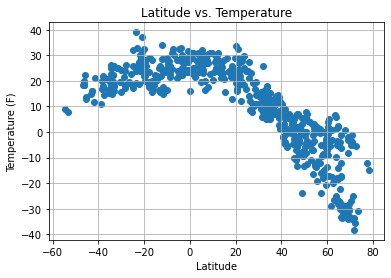

In [58]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

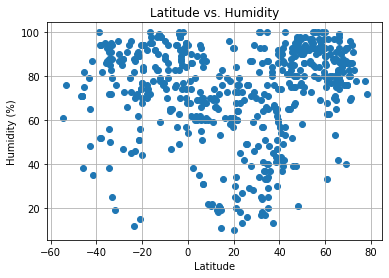

In [59]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

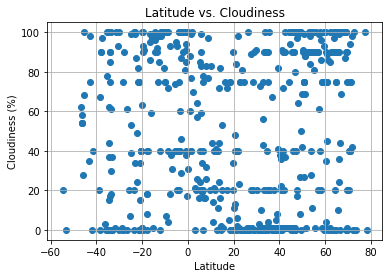

In [60]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

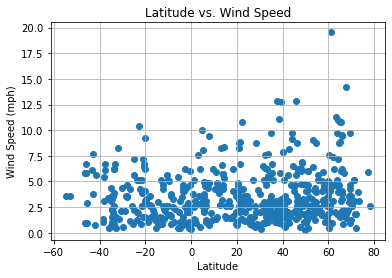

In [61]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression